# GLCM texture feature extraction
#### Input:      Multi-spectral image tree.tif (5 bands)
#### Output:  11 texture features calculated  for R, G, B band, respectively.

In [1]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import time
import gdal
import fast_glcm # import fast_glcm.py

In [2]:
input_dir = r"data/tree.tif" # Path to multispectral image

image = gdal.Open(input_dir)  # If the image has multi-bands, it needs to be converted to grayscale image
image = image.ReadAsArray()   # image to array
n_ch = image.shape[0] # bands number
print(n_ch)           # print out
m_img = np.uint8(255.0 * (image - np.min(image)) / (np.max(image) - np.min(image)))  # normalization

4


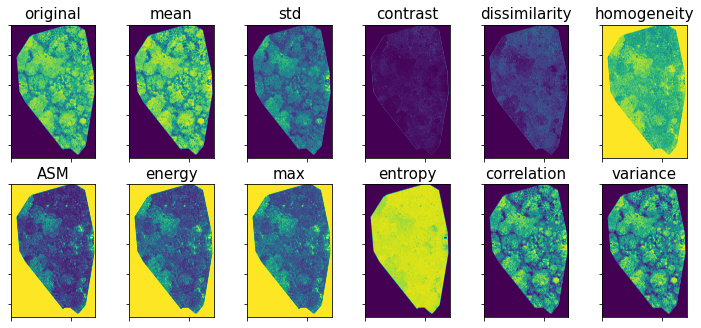

Band1 GLCM Calculation Start:1618938489.5510607
Band1 GLCM Calculation End:1618938515.1898158
Time:25.638755083084106 seconds


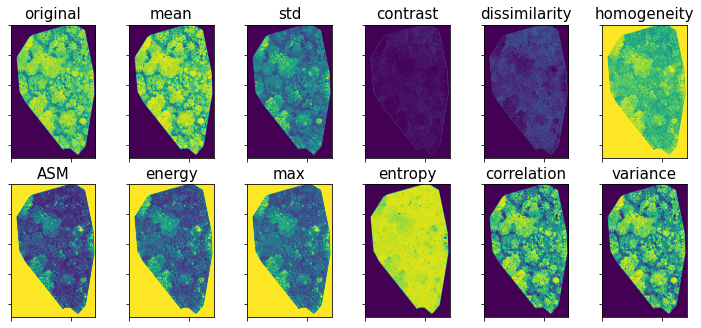

Band2 GLCM Calculation Start:1618938515.1898158
Band2 GLCM Calculation End:1618938540.461322
Time:25.271506309509277 seconds


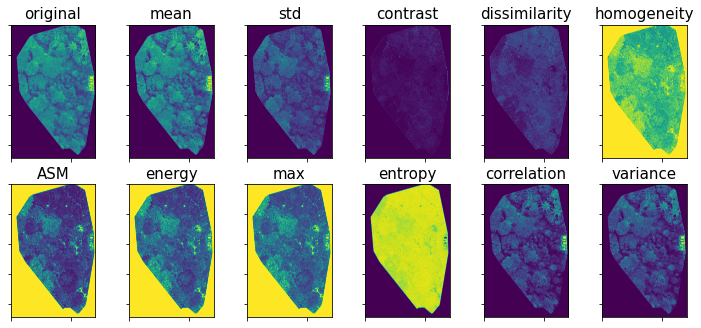

Band3 GLCM Calculation Start:1618938540.461322
Band3 GLCM Calculation End:1618938566.358432
Time:25.897109985351562 seconds


In [11]:
for n_ch in range(0,3): # Only use rgb bands
        start_time = time.time() # obtain system time
        img = m_img[n_ch, :, :] # extract each band
        h, w = img.shape # get width and heighth of image
        vmin = 0   # set pixel value minimum
        vmax = 255 # set pixel value maximum
        nbit = 8   # set image bit
        kernel_size = 3 # set sliding window size
        ks = kernel_size # abbreviation
        
        # Use functions in fast_glcm.py to calculate textural features
        mean = fast_glcm.fast_glcm_mean(img, vmin, vmax, nbit, kernel_size)          # mean
        std = fast_glcm.fast_glcm_std(img, vmin, vmax, nbit, kernel_size)            # std
        cont = fast_glcm.fast_glcm_contrast(img, vmin, vmax, nbit, kernel_size)      # cont
        diss = fast_glcm.fast_glcm_dissimilarity(img, vmin, vmax, nbit, kernel_size) # diss
        homo = fast_glcm.fast_glcm_homogeneity(img, vmin, vmax, nbit, kernel_size)   # homo
        asm, ene = fast_glcm.fast_glcm_ASM(img, vmin, vmax, nbit, kernel_size)       # asm, energy
        ma = fast_glcm.fast_glcm_max(img, vmin, vmax, nbit, kernel_size)             # maximum
        ent = entropy(img, disk(ks))                                                 # entropy
        corr = fast_glcm.fast_glcm_correlation(img, vmin, vmax, nbit, kernel_size)   # correlation
        vars = fast_glcm.fast_glcm_variance(img, vmin, vmax, nbit, kernel_size)      # variance
        
        # plot textural feature map
        plt.figure(figsize=(10, 4.5)) # set figure size
        fs = 15 # set font size
        plt.subplot(2, 6, 1)# plot origainal image
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(img) # show original image
        plt.title('original', fontsize=fs) # set title

        plt.subplot(2, 6, 2)# plot mean
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(mean) # show mean
        plt.title('mean', fontsize=fs)# set title

        plt.subplot(2, 6, 3)# plot std
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(std) # show std
        plt.title('std', fontsize=fs)# set title

        plt.subplot(2, 6, 4)# plot contrast
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(cont) # show contrast
        plt.title('contrast', fontsize=fs)# set title

        plt.subplot(2, 6, 5)# plot dissimilarity
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(diss) # show dissimilarity
        plt.title('dissimilarity', fontsize=fs)# set title

        plt.subplot(2, 6, 6)# plot homogeneity
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(homo) # show homogeneity
        plt.title('homogeneity', fontsize=fs)# set title

        plt.subplot(2, 6, 7)# plot asm
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(asm) # show asm
        plt.title('ASM', fontsize=fs)# set title

        plt.subplot(2, 6, 8)# plot energy
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(ene) # show energy
        plt.title('energy', fontsize=fs)# set title

        plt.subplot(2, 6, 9)# plot maximum
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(ma) # show maximum
        plt.title('max', fontsize=fs)# set title

        plt.subplot(2, 6, 10)# plot entropy
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(ent) # show entropy
        plt.title('entropy', fontsize=fs)# set title

        plt.subplot(2, 6, 11)# plot correlation
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(corr) # show correlation
        plt.title('correlation', fontsize=fs)# set title
       

        plt.subplot(2, 6, 12)# plot variance
        plt.tick_params(labelbottom=False, labelleft=False)# set ticks
        plt.imshow(vars) # show variances
        plt.title('variance', fontsize=fs)# set title
        plt.tight_layout(pad=0.5) # set layout
        
        n_band = n_ch+1 # set bands
        plt.savefig('./results/res{}/band{}_output.jpg'.format(ks, n_band))  # save figure
        plt.show() # show plot figure
        
        # save textural feature images
        mean = Image.fromarray(mean) # transform array to image
        mean.save("./results/res{}/band{}_mean.tif".format(ks, n_band))# save image as tif
        std = Image.fromarray(std)  # transform array to image
        std.save("./results/res{}/band{}_std.tif".format(ks, n_band))# save image as tif
        cont = Image.fromarray(cont)  # transform array to image
        cont.save("./results/res{}/band{}_cont.tif".format(ks, n_band))# save image as tif
        diss = Image.fromarray(diss)  # transform array to image
        diss.save("./results/res{}/band{}_diss.tif".format(ks, n_band))# save image as tif
        homo = Image.fromarray(homo)  # transform array to image
        homo.save("./results/res{}/band{}_homo.tif".format(ks, n_band))# save image as tif
        asm = Image.fromarray(asm)  # transform array to image
        asm.save("./results/res{}/band{}_asm.tif".format(ks, n_band))# save image as tif
        ene = Image.fromarray(ene)  # transform array to image
        ene.save("./results/res{}/band{}_ene.tif".format(ks, n_band))# save image as tif
        ma = Image.fromarray(ma) # transform array to image
        ma.save("./results/res{}/band{}_ma.tif".format(ks, n_band))# save image as tif
        ent = Image.fromarray(ent) # transform array to image
        ent.save("./results/res{}/band{}_ent.tif".format(ks, n_band))# save image as tif
        corr = Image.fromarray(corr) # transform array to image
        corr.save("./results/res{}/band{}_corr.tif".format(ks, n_band))# save image as tif
        vars0 = Image.fromarray(vars) # transform array to image
        vars0.save("./results/res{}/band{}_vars.tif".format(ks, n_band))# save image as tif


        print('Band{} GLCM Calculation Start:{}'.format(n_band, start_time)) # print out start time 
        end_time = time.time() # obtain system time 
        print('Band{} GLCM Calculation End:{}'.format(n_band, end_time)) # print out end time

        total_time = end_time - start_time # calculate total cost of time
        print('Time:{} seconds'.format(total_time)) # print cost of time